In [1]:
import pandas as pd

In [14]:
df1 = pd.read_excel("datasets\Aracaju.xlsx")

df2 = pd.read_excel("datasets\Fortaleza.xlsx")

df3 = pd.read_excel("datasets\CidadeNatal.xlsx")

df4 = pd.read_excel("datasets\Recife.xlsx")

df5 = pd.read_excel("datasets\Salvador.xlsx")

In [15]:
df = pd.concat([df1,df2,df3,df4,df5])

In [16]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [17]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [19]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde
134,Salvador,2019-03-02,125.90,1036,1
54,Aracaju,2018-01-01,20.85,1523,1
131,Natal,2019-01-02,63.48,1037,3
205,Salvador,2019-01-02,196.09,1037,1
34,Natal,2019-01-07,484.00,852,2
62,Fortaleza,2019-01-01,106.21,1005,6


In [20]:
df["LojaID"] = df["LojaID"].astype("object")

In [21]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [22]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Tratando valores faltantes**

In [23]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [24]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [25]:
df["Vendas"].mean()

122.61180089485458

In [26]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [27]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
190,Natal,2019-01-02,78.78,1035,3
53,Fortaleza,2019-01-01,11.48,1002,4
19,Aracaju,2018-01-01,43.96,1520,9
19,Fortaleza,2019-01-01,18.86,1002,3
97,Recife,2019-01-01,153.04,983,4
138,Natal,2019-01-02,212.03,1037,3
146,Natal,2019-01-02,149.88,1037,1
66,Recife,2019-01-01,14.59,983,7
238,Salvador,2019-01-03,139.64,1035,1
10,Aracaju,2019-01-01,42.34,1522,6


In [28]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [29]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [30]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 

In [31]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [32]:
df["Receita"].max()

3544.0

In [33]:
df["Receita"].min()

3.34

In [34]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [35]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [36]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [37]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**Trabalhando com datas**

In [38]:
#Trasnformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [39]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [40]:
df["Data"] = pd.to_datetime(df["Data"])

In [41]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [42]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [43]:
df["Ano_Venda"] = df["Data"].dt.year

In [44]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
7,Natal,2019-03-18,886.00,853,4,3544.00,4.0,2019
100,Aracaju,2018-01-01,180.57,1520,6,1083.42,6.0,2018
106,Aracaju,2018-01-01,16.32,1520,7,114.24,7.0,2018
88,Salvador,2019-01-01,31.20,1036,1,31.20,1.0,2019
125,Natal,2019-01-02,25.00,1037,2,50.00,2.0,2019
62,Salvador,2019-01-01,161.02,1037,3,483.06,3.0,2019
103,Aracaju,2018-01-01,12.62,1522,3,37.86,3.0,2018
184,Salvador,2019-01-02,167.16,1037,1,167.16,1.0,2019
77,Recife,2019-01-01,102.82,981,6,616.92,6.0,2019
149,Natal,2019-01-02,22.38,1034,3,67.14,3.0,2019


In [45]:
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [46]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
131,Natal,2019-01-02,63.48,1037,3,190.44,3.0,2019,1,2
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2.0,2019,2,11
55,Recife,2019-01-01,20.03,983,4,80.12,4.0,2019,1,1
110,Natal,2019-01-02,185.93,1036,3,557.79,3.0,2019,1,2
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2.0,2018,1,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019,1,1
3,Fortaleza,2019-02-10,20.95,1004,6,125.70,6.0,2019,2,10
227,Salvador,2019-01-02,14.70,1035,1,14.70,1.0,2019,1,2
191,Salvador,2019-01-02,173.59,1034,2,347.18,2.0,2019,1,2


In [47]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [48]:
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [49]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
69,Fortaleza,2019-01-01,216.65,1003,6,1299.90,6.0,2019,1,1,365 days
133,Salvador,2019-03-02,153.71,1035,1,153.71,1.0,2019,3,2,425 days
2,Salvador,2019-02-10,173.59,1035,3,520.77,3.0,2019,2,10,405 days
21,Salvador,2019-01-01,39.72,1035,3,119.16,3.0,2019,1,1,365 days
57,Aracaju,2018-01-01,23.49,1520,7,164.43,7.0,2018,1,1,0 days


In [50]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [51]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
79,Fortaleza,2019-01-01,41.25,1005,6,247.50,6.0,2019,1,1,365 days,1
83,Salvador,2019-01-01,63.66,1036,2,127.32,2.0,2019,1,1,365 days,1
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
136,Natal,2019-01-02,13.81,1036,1,13.81,1.0,2019,1,2,366 days,1
171,Natal,2019-01-02,136.45,1035,3,409.35,3.0,2019,1,2,366 days,1


In [52]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [53]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
135,Recife,2019-03-02,10.79,983,5,53.95,5.0,2019,3,2,425 days,1
113,Salvador,2019-03-02,18.90,1034,3,56.70,3.0,2019,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2.0,2019,3,2,425 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
112,Recife,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
120,Recife,2019-03-02,184.90,982,4,739.60,4.0,2019,3,2,425 days,1
50,Natal,2019-03-08,324.00,854,4,1296.00,4.0,2019,3,8,431 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,4.0,2019,3,27,450 days,1
110,Salvador,2019-03-02,185.93,1036,3,557.79,3.0,2019,3,2,425 days,1


**Visualização de dados**

In [54]:
df["LojaID"].value_counts(ascending=False)

LojaID
1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: count, dtype: int64

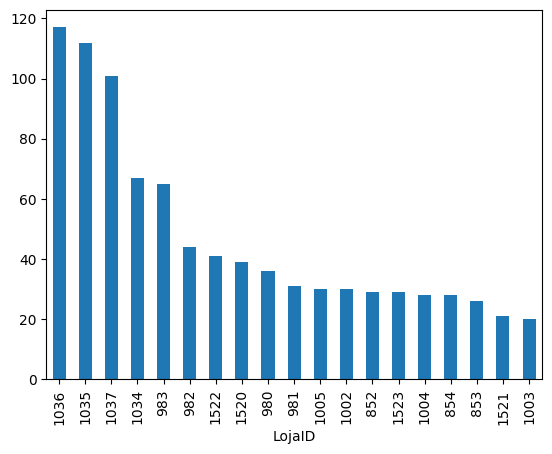

In [62]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar();

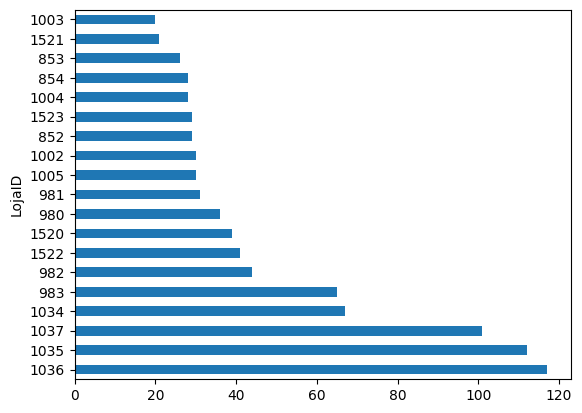

In [63]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh();

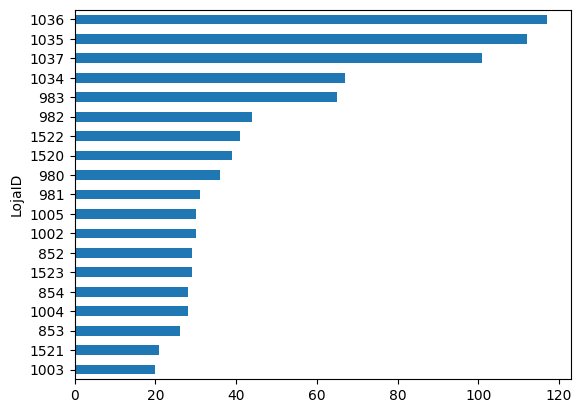

In [64]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

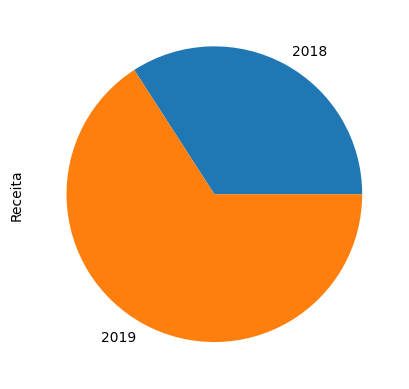

In [65]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [60]:
#Total vendas por cidade
df["Cidade"].value_counts()

Cidade
Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: count, dtype: int64

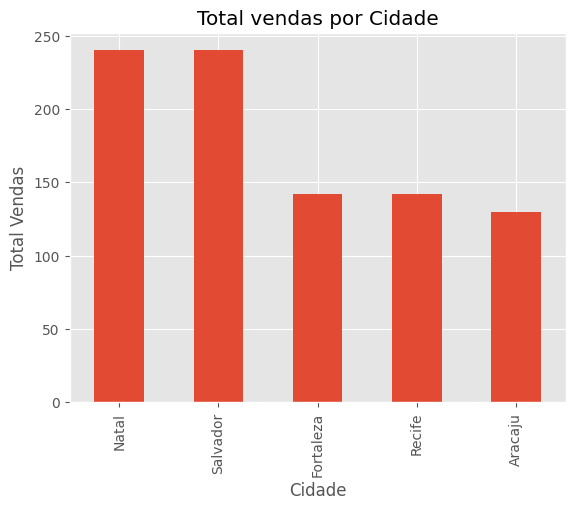

In [73]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

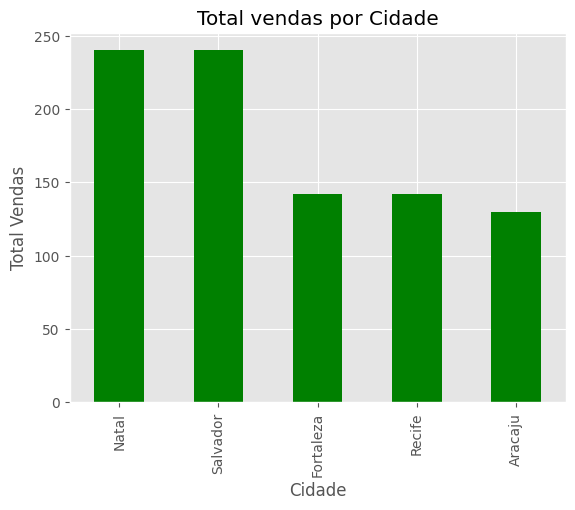

In [86]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [69]:
#Alterando o estilo
plt.style.use("ggplot")

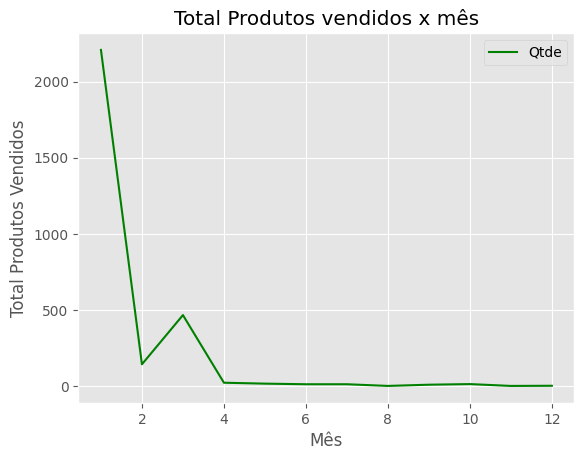

In [85]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês", color="green")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [74]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [75]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [76]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

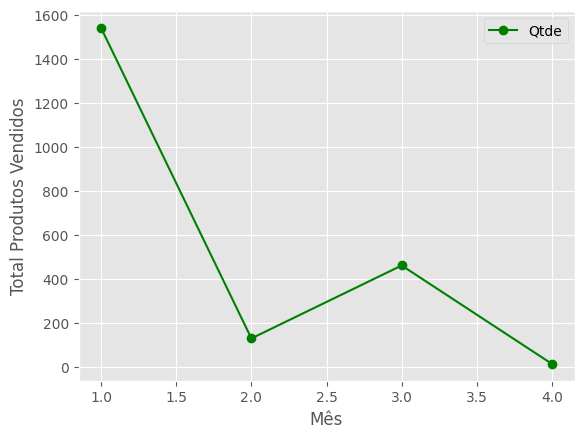

In [84]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o", color="green")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

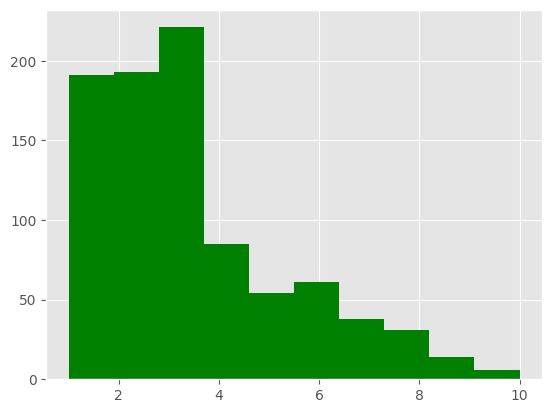

In [81]:
#Histograma
plt.hist(df["Qtde"], color="green");

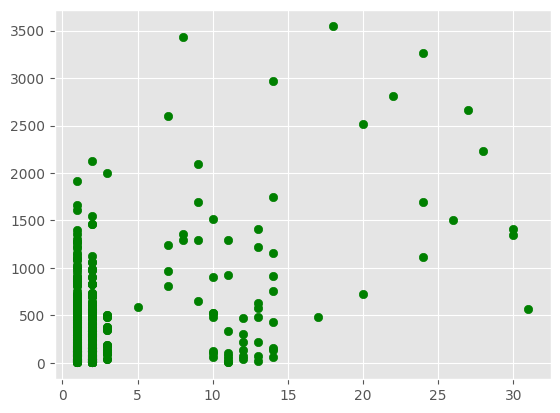

In [83]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"], color="green");

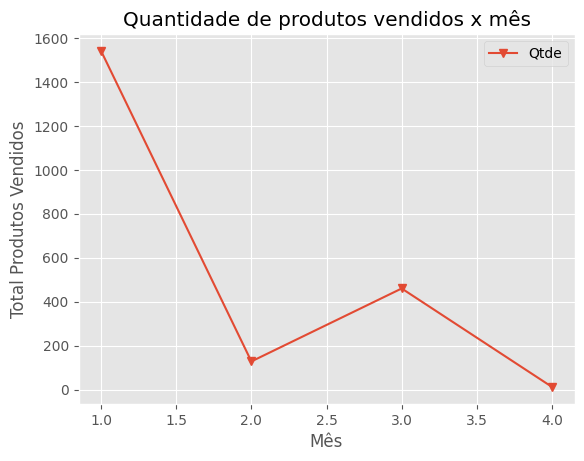

In [80]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")